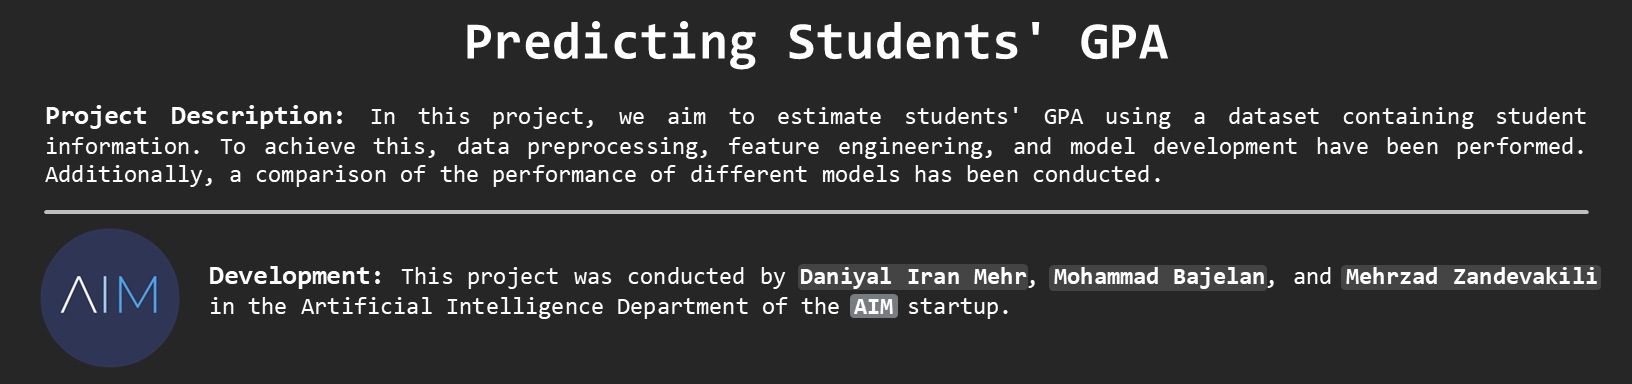

## Summary
Model: MLPRegressor (Multi-Layer Perceptron Regressor)

Accuracy: 91%

## Dataset Information
In the <code>data</code> folder, there are two files named <code>train.csv</code> and <code>test.csv</code>, which represent the training and test datasets, respectively.
    The training dataset consists of 1,912 rows and 14 columns.
    The test dataset contains 479 rows and includes all columns except <code>GPA</code>.


| **Feature Name** | **Description** |
| :---: | :--- |
| `StudentID` | Student_ID |
| `Age` | Age |
| `Gender` | Gender (0 for male, 1 for female) |
| `Ethnicity` | Student's ethnicity |
| `ParentalEducation` | Parents' education level |
| `StudyTimeWeekly` | Weekly study hours (range: 0 to 20 hours) |
| `Absences` | Number of absences in an academic year (range: 0 to 30) |
| `Tutoring` | Private tutoring status (0 for no, 1 for yes) |
| `ParentalSupport` | Level of parental support |
| `Extracurricular` | Participation in extracurricular programs (0 for no, 1 for yes) |
| `Sports` | Participation in sports programs (0 for no, 1 for yes) |
| `Music` | Participation in music programs (0 for no, 1 for yes) |
| `Volunteering` | Participation in volunteer programs (0 for no, 1 for yes) |
| `GPA` | Grade Point Average (GPA) in the range of 0 to 4 |


### Libraries

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

### Load Dataset

In [3]:
dfTest = pd.read_csv(r"C:/Users/LenOvO/AIM/Quera/avg/data/test.csv")
dfTrain = pd.read_csv(r"C:/Users/LenOvO/AIM/Quera/avg/data/train.csv")

### Data processing

In [4]:
X_train = dfTrain.iloc[:, :-1]  # Features
y_train = dfTrain.iloc[:, -1]  # GPA

X_train = X_train.drop(columns=["ParentalSupport","ParentalEducation"])
X_train = X_train.drop(columns=["StudentID"])

Ethnicity_dic = {"Caucasian" : 1,
                 "Other" : 2,
                 "Asian" : 3,
                 "African American" : 4}
X_train["Ethnicity"] = X_train["Ethnicity"].map(Ethnicity_dic)
X_train

,Age,Gender,Ethnicity,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering
0,18,1,1,18.118879,24,1,1,1,0,0
1,16,1,2,2.469271,19,0,0,0,0,1
2,17,0,3,3.456401,25,0,0,0,0,0
3,17,1,1,15.838131,25,1,0,0,0,0
4,16,0,1,1.045373,19,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1908,15,0,4,13.092424,13,1,0,0,0,0
1909,16,0,1,2.159249,19,0,0,1,0,0
1910,16,1,1,3.572578,14,1,1,1,0,0
1911,18,0,2,4.402585,20,0,0,0,0,0


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))  # Definition of the 0 to 1 scale
X_train["StudyTimeWeekly"] = scaler.fit_transform(X_train[["StudyTimeWeekly"]])
X_train

,Age,Gender,Ethnicity,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering
0,18,1,1,0.907339,24,1,1,1,0,0
1,16,1,2,0.123306,19,0,0,0,0,1
2,17,0,3,0.172761,25,0,0,0,0,0
3,17,1,1,0.793076,25,1,0,0,0,0
4,16,0,1,0.051970,19,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1908,15,0,4,0.655518,13,1,0,0,0,0
1909,16,0,1,0.107774,19,0,0,1,0,0
1910,16,1,1,0.178581,14,1,1,1,0,0
1911,18,0,2,0.220164,20,0,0,0,0,0


### Create new processed Datasets

In [6]:
df_processed = pd.concat([X_train, y_train], axis=1)
df_processed.to_csv(r"../data/processed_train.csv", index=False)

### Split datas to train and test

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.3,random_state=42)

### Model training

In [8]:
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, learning_rate_init=0.001, random_state=42,activation='tanh',tol=0.001)
model.fit(x_train,y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 50), max_iter=1000,
             random_state=42, tol=0.001)

### Model Testing

In [9]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

0.9112066691461791

### Predict test.csv

In [10]:
x_test_final = dfTest
x_test_final = x_test_final.drop(columns=["ParentalSupport","ParentalEducation"])
x_test_final = x_test_final.drop(columns=["StudentID"])

Ethnicity_dic = {"Caucasian" : 1,
                 "Other" : 2,
                 "Asian" : 3,
                 "African American" : 4,}
x_test_final["Ethnicity"] = x_test_final["Ethnicity"].map(Ethnicity_dic)

scaler = MinMaxScaler(feature_range=(0, 1))
x_test_final["StudyTimeWeekly"] = scaler.fit_transform(x_test_final[["StudyTimeWeekly"]])
x_test_final

,Age,Gender,Ethnicity,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering
0,15,1,3,0.006743,17,0,0,1,1,1
1,16,1,1,0.099558,0,0,1,0,0,1
2,15,0,1,0.529991,15,0,0,0,0,1
3,18,1,4,0.811312,1,0,1,0,0,0
4,18,0,1,0.178994,27,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
474,18,1,1,0.421061,16,0,0,1,0,0
475,18,1,1,0.158650,12,1,1,1,0,0
476,17,0,1,0.257339,5,1,0,0,0,0
477,18,1,4,0.514619,10,0,1,0,0,0


In [11]:
Result = model.predict(x_test_final)
Result = pd.DataFrame(Result, columns=["GPA"])
Result

,GPA
0,1.522268
1,3.205451
2,1.546295
3,3.329821
4,0.573453
...,...
474,1.768667
475,2.496180
476,2.767178
477,2.331064


### Create new processed Datasets

In [12]:
df_processed = pd.concat([x_test_final, Result], axis=1)
df_processed.to_csv(r"../data/processed_test.csv", index=False)

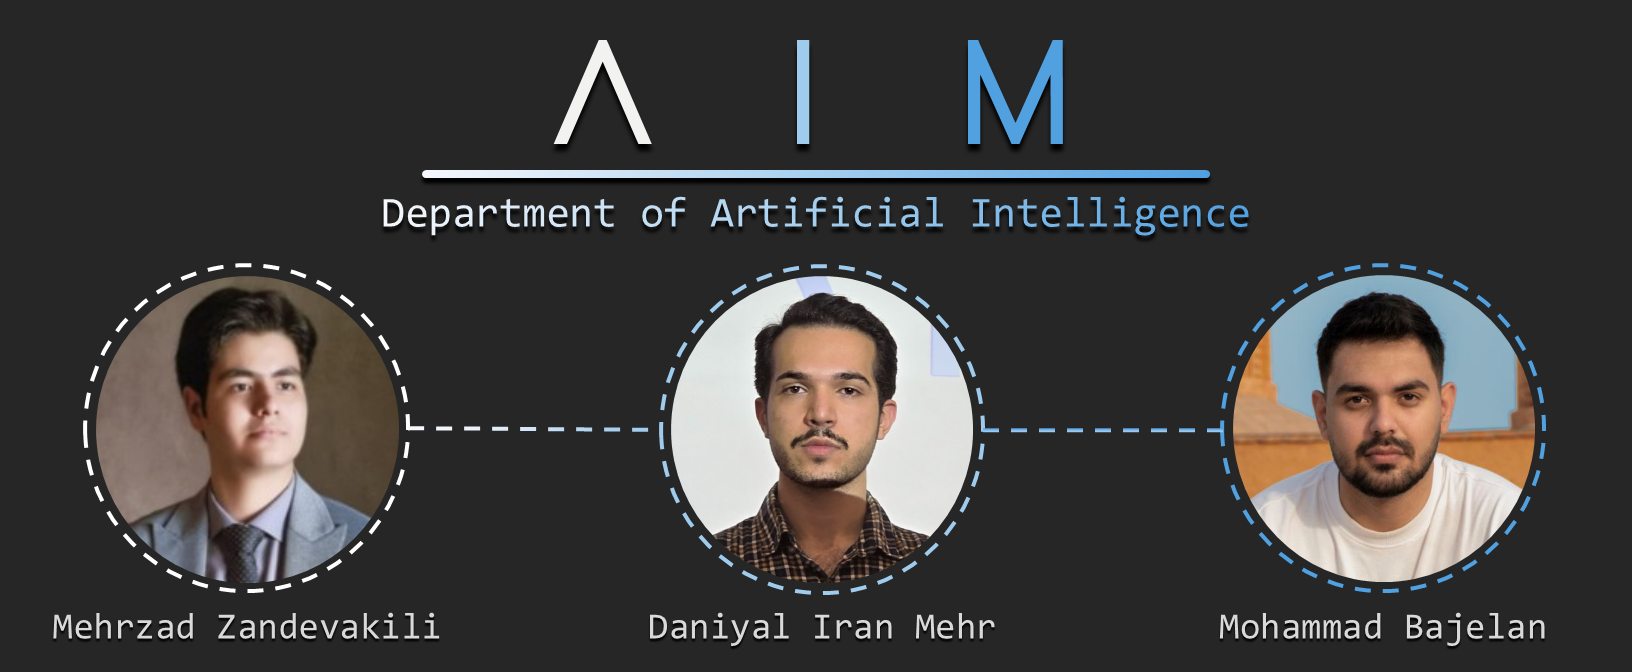